In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  1. Dataset Overview
# The dataset contains records of Olympic medal winners over the years.

# Key columns include: Athlete, Gender, Country, Sport, Year, Medal.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Summer-Olympic-medals-1976-to-2008.csv to Summer-Olympic-medals-1976-to-2008.csv


In [5]:
df = pd.read_csv('/content/Olympics-dataset.csv',encoding='latin1',on_bad_lines='skip')
df.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [6]:
# See the shape
print("Shape:", df.shape)

# See column names
print("Columns:", df.columns.tolist())

# Check for missing values
df.isnull().sum()


Shape: (15433, 11)
Columns: ['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender', 'Country_Code', 'Country', 'Event_gender', 'Medal']


,0
City,117
Year,117
Sport,117
Discipline,117
Event,117
Athlete,117
Gender,117
Country_Code,117
Country,117
Event_gender,117


In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df['Medal'].fillna('No Medal', inplace=True)


/tmp/ipython-input-304092518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medal'].fillna('No Medal', inplace=True)


In [9]:
df.isnull().mean() * 100


,0
City,0.006529
Year,0.006529
Sport,0.006529
Discipline,0.006529
Event,0.006529
Athlete,0.006529
Gender,0.006529
Country_Code,0.006529
Country,0.006529
Event_gender,0.006529


In [10]:
df.to_csv('clean_olympics.csv', index=False)


In [11]:
print("="*40)
print("DATASET INFO")
print("="*40)
data_set_info = df.info()
display(data_set_info)

print("\n" + "="*40)
print("DATASET STATISTICS")
print("="*40)
desc_stats = df.describe(include='all')
display(desc_stats)  # 'display' gives prettier tables in Jupyter/Colab


DATASET INFO
<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15315 non-null  object 
 1   Year          15315 non-null  float64
 2   Sport         15315 non-null  object 
 3   Discipline    15315 non-null  object 
 4   Event         15315 non-null  object 
 5   Athlete       15315 non-null  object 
 6   Gender        15315 non-null  object 
 7   Country_Code  15315 non-null  object 
 8   Country       15315 non-null  object 
 9   Event_gender  15315 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


None


DATASET STATISTICS


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15315,15315.000000,15315,15315,15315,15315,15315,15315,15315,15315,15316
unique,9,NaN,28,41,293,11337,2,128,127,3,4
top,Beijing,NaN,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,NaN,2210,1523,816,16,9387,1992,1992,8816,5258
mean,NaN,1993.621678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,10.159586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1996.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


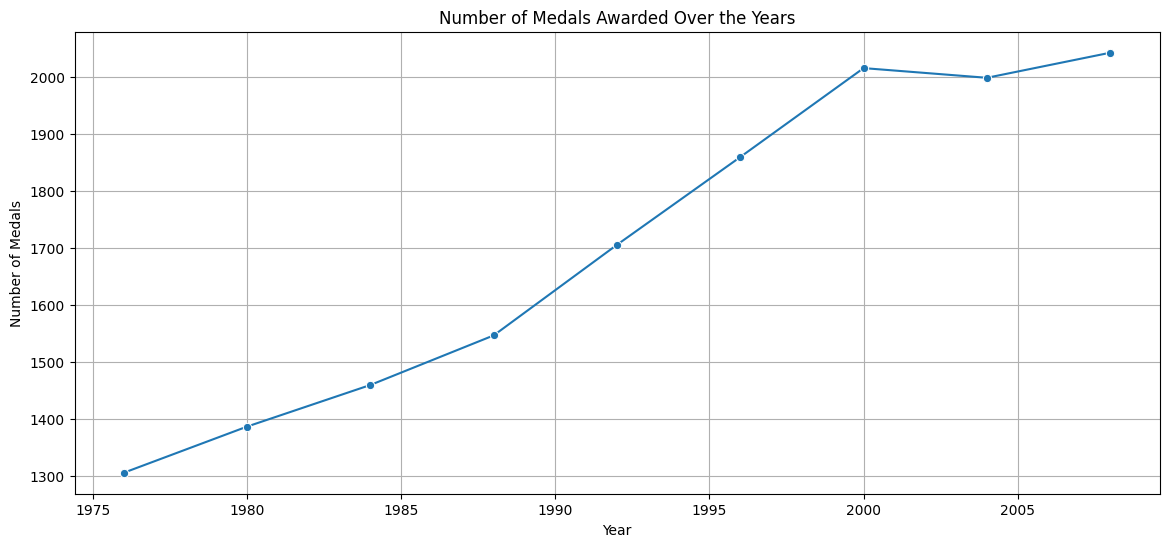

In [12]:
medals_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(14,6))
sns.lineplot(x=medals_per_year.index, y=medals_per_year.values, marker="o")
plt.title("Number of Medals Awarded Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.show()


#  2. Medals Awarded Over the Years
# Visualization:
# Line plot showing number of medals given out each year.

#  Insight:
# Medal distribution increased over time, reflecting more events and participation.

# Drops during world war years (e.g., 1916, 1940, 1944) where Olympics were not held.


/tmp/ipython-input-1577045931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="rocket")


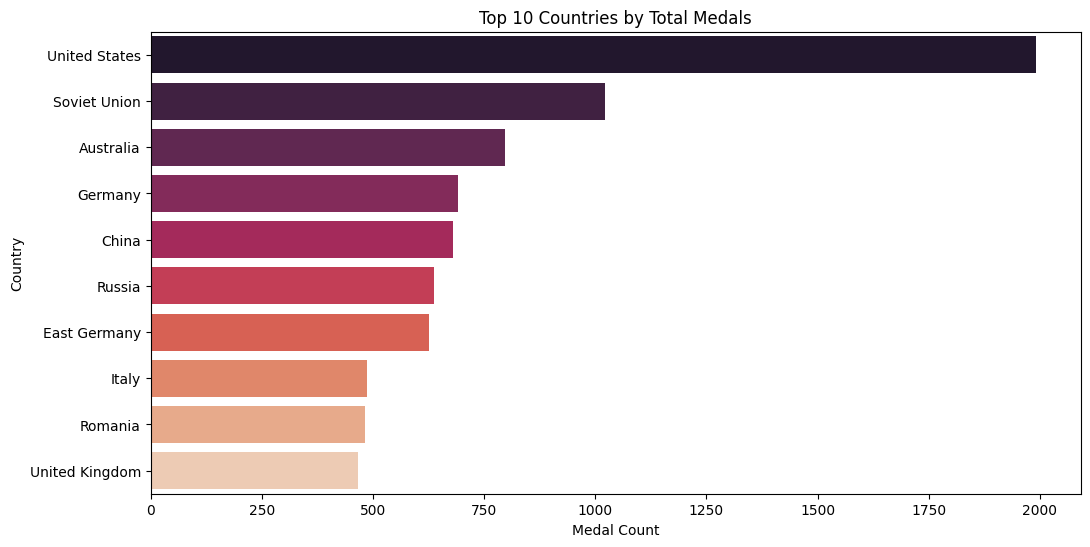

In [13]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="rocket")
plt.title("Top 10 Countries by Total Medals")
plt.xlabel("Medal Count")
plt.ylabel("Country")
plt.show()


# 3. Top 10 Countries by Total Medals
#  Visualization:
# Bar plot of countries with the highest medal counts.

#  Insight:
# USA leads by a huge margin.

# Followed by countries like Russia, Australia, and Germany.

# Developed nations dominate medal counts, indicating investment in sports infrastructure.


/tmp/ipython-input-784170711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medals_by_gender.index, y=medals_by_gender.values, palette="cubehelix")


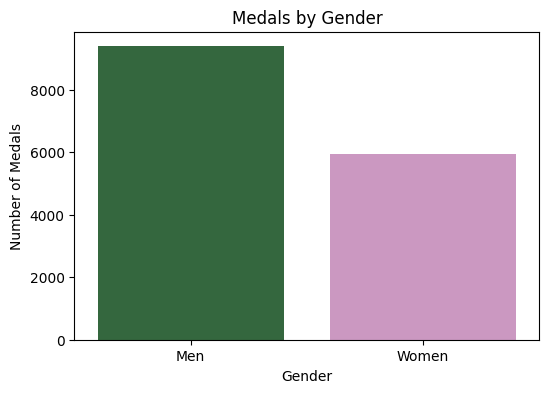

In [14]:
medals_by_gender = df['Gender'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=medals_by_gender.index, y=medals_by_gender.values, palette="cubehelix")
plt.title("Medals by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Medals")
plt.show()


#  4. Medals by Gender
#  Visualization:
# Bar chart of medal count by Gender.

#  Insight:
# Historically, male athletes have won more medals.

# But female participation has significantly increased over time (confirmed in following charts).


/tmp/ipython-input-2280356456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.values, y=top_sports.index, palette="coolwarm")


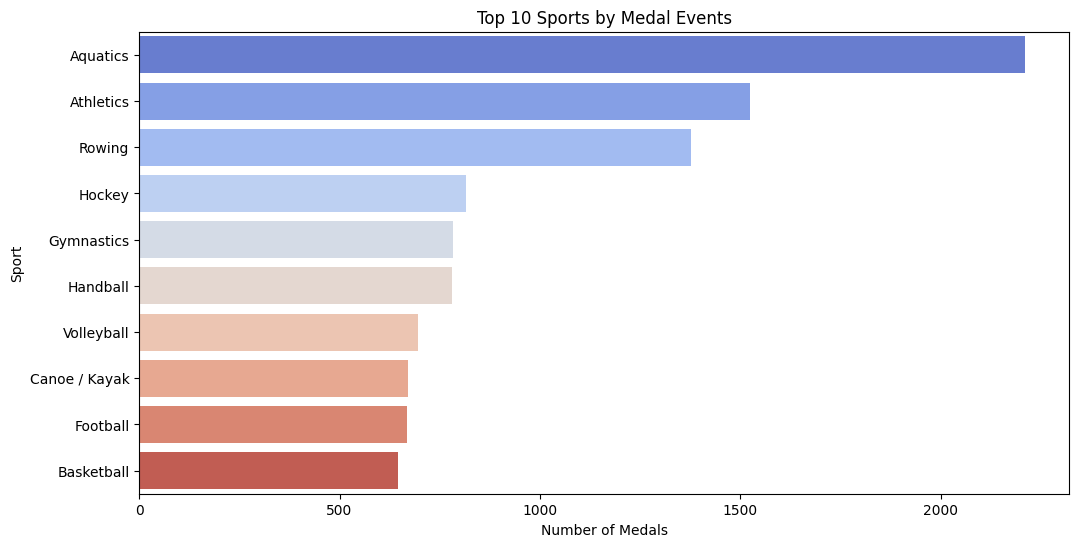

In [15]:
top_sports = df['Sport'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sports.values, y=top_sports.index, palette="coolwarm")
plt.title("Top 10 Sports by Medal Events")
plt.xlabel("Number of Medals")
plt.ylabel("Sport")
plt.show()


#  5. Top 10 Sports by Medals
#  Visualization:
# Bar chart of sports with most medal events.

#  Insight:
# Athletics and Aquatics are the most medal-rich sports.

# Followed by sports like Rowing, Hockey, Gymnastics and Handball.


/tmp/ipython-input-1940620569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medal_distribution.index, y=medal_distribution.values, palette="magma")


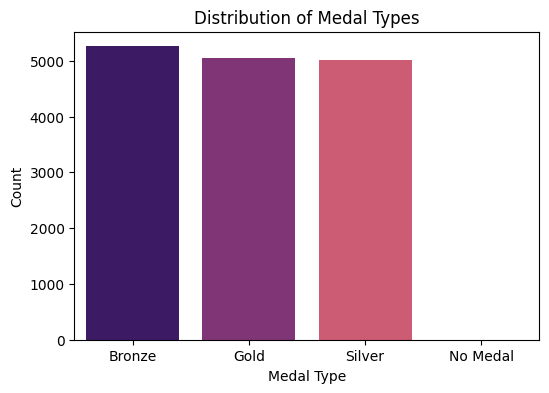

In [16]:
medal_distribution = df['Medal'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=medal_distribution.index, y=medal_distribution.values, palette="magma")
plt.title("Distribution of Medal Types")
plt.xlabel("Medal Type")
plt.ylabel("Count")
plt.show()


#  6. Medal Type Distribution
#  Visualization:
# Bar plot showing count of Gold, Silver, Bronze, and No Medal.

#  Insight:
# Gold is awarded as same as Silver (approx), with Bronze being the most frequent indicating competition density throughout the years.

# Many athletes participated but didn’t win any medal (classified as “No Medal”).


In [17]:
medal_count_by_country = df[df['Medal'] != 'No Medal'].groupby('Country')['Medal'].count().sort_values(ascending=False)
medal_count_by_country = medal_count_by_country.reset_index().rename(columns={'Medal': 'Total_Medals'})
medal_count_by_country.head()

# Describes the dominance of few countries which have obtained more medals and shows Talent and performance metrics.

,Country,Total_Medals
0,United States,1992
1,Soviet Union,1021
2,Australia,798
3,Germany,691
4,China,679


In [18]:
medal_types = df[df['Medal'] != 'No Medal'].groupby(['Country', 'Medal']).size().unstack(fill_value=0)
medal_types = medal_types.reset_index()
medal_types.head()
# Categorization of the different medals won by the countries.

Medal,Country,Bronze,Gold,Silver
0,Afghanistan,1,0,0
1,Algeria,8,4,2
2,Argentina,70,46,37
3,Armenia,7,1,1
4,Australia,312,216,270


In [19]:
country_medals = pd.merge(medal_count_by_country, medal_types, on='Country')
country_medals.head()
#Further Clubbing the two tables we get the following:

,Country,Total_Medals,Bronze,Gold,Silver
0,United States,1992,481,928,583
1,Soviet Union,1021,297,439,285
2,Australia,798,312,216,270
3,Germany,691,278,237,176
4,China,679,193,234,252


In [20]:
athletes_per_country = df.groupby('Country')['Athlete'].nunique().sort_values(ascending=False)
athletes_per_country = athletes_per_country.reset_index().rename(columns={'Athlete': 'Unique_Athletes'})
athletes_per_country.head()

#Number of Unique Athletes from each country illustrating the resources-distribution.

,Country,Unique_Athletes
0,United States,1369
1,Soviet Union,795
2,Australia,540
3,Germany,492
4,China,486


In [21]:
country_medals = pd.merge(country_medals, athletes_per_country, on='Country')
country_medals.head()
#Clubbing the columns further.

,Country,Total_Medals,Bronze,Gold,Silver,Unique_Athletes
0,United States,1992,481,928,583,1369
1,Soviet Union,1021,297,439,285,795
2,Australia,798,312,216,270,540
3,Germany,691,278,237,176,492
4,China,679,193,234,252,486


In [22]:
df['Decade'] = (df['Year'] // 10) * 10
df[['Year', 'Decade']].head()


,Year,Decade
0,1976.0,1970.0
1,1976.0,1970.0
2,1976.0,1970.0
3,1976.0,1970.0
4,1976.0,1970.0


In [23]:
df.to_csv('olympics_with_features.csv', index=False)
country_medals.to_csv('country_medal_summary.csv', index=False)


In [24]:
country_medals['Medals_per_Athlete'] = (country_medals['Total_Medals'] / country_medals['Unique_Athletes']).round(2)
top_efficiency = country_medals.sort_values(by='Medals_per_Athlete', ascending=False).head(10)
top_efficiency[['Country', 'Total_Medals', 'Unique_Athletes', 'Medals_per_Athlete']]

#  7. Most Efficient Countries (Medals per Athlete)
#  Table:
# Sorted DataFrame showing Medals / Unique Athletes.

#  Insight:
# Some smaller nations like Namibia, Costa Rica, Equador have high medal-per-athlete ratios, indicating efficiency over volume.

# Helps understand countries that do more with fewer resources.

,Country,Total_Medals,Unique_Athletes,Medals_per_Athlete
85,Namibia,4,1,4.00
86,Costa Rica,4,2,2.00
94,Ecuador,2,1,2.00
96,Suriname,2,1,2.00
102,Mozambique,2,1,2.00
52,Slovakia,29,16,1.81
31,Jamaica,89,52,1.71
50,Ethiopia,32,19,1.68
8,Romania,482,303,1.59
76,Trinidad and Tobago,11,7,1.57


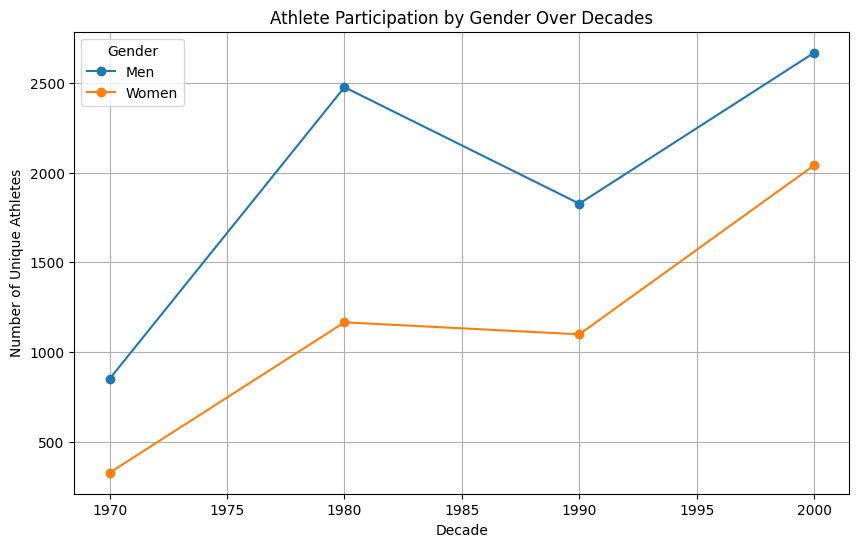

In [25]:
gender_decade = df.groupby(['Decade', 'Gender'])['Athlete'].nunique().unstack()
gender_decade.plot(kind='line', figsize=(10,6), marker='o')
plt.title("Athlete Participation by Gender Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Unique Athletes")
plt.grid(True)
plt.show()



#  8. Gender Participation Over Decades
#  Visualization:
# Line plot of unique male and female athletes by decade.

#  Insight:
# Steady rise in female athlete participation.

# Gender gap is closing over time, especially from 1990s onward.

/tmp/ipython-input-2649240910.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_medal_counts.values, y=sport_medal_counts.index, palette="rocket")


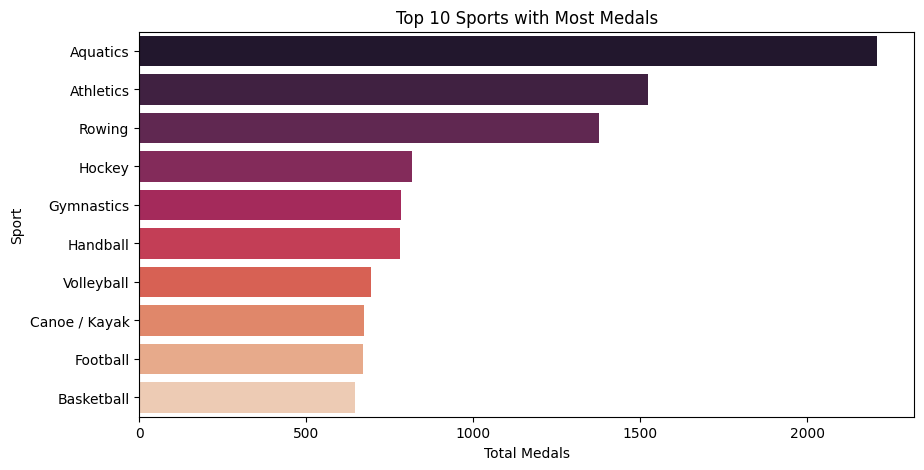

In [26]:
sport_medal_counts = df[df['Medal'] != 'No Medal'].groupby('Sport')['Medal'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=sport_medal_counts.values, y=sport_medal_counts.index, palette="rocket")
plt.title("Top 10 Sports with Most Medals")
plt.xlabel("Total Medals")
plt.ylabel("Sport")
plt.show()

#The horizontal bar graph describes about the Top 10 Sports with most Medals
#Athletics,Aquatics,Rowing and Hockey can be considered medal-rich sports according to the data provided and visualization.

In [28]:
top_sport_country = df[df['Medal'] != 'No Medal'].groupby(['Sport', 'Country'])['Medal'].count().reset_index()
top_country_per_sport = top_sport_country.sort_values('Medal', ascending=False).drop_duplicates('Sport')
top_country_per_sport.head(10)


#  9. Most Successful Countries by Sport
#  Table:
# Top medal-winning country in each sport.

#  Insight:
# USA dominates Athletics and Swimming.

# Some countries specialize in specific sports (e.g., USA in Athletics, Romania in Rowing and Gymnastics).


,Sport,Country,Medal
43,Aquatics,United States,578
142,Athletics,United States,299
172,Basketball,United States,192
431,Hockey,Netherlands,159
531,Rowing,Romania,156
393,Gymnastics,Romania,116
338,Fencing,France,115
153,Baseball,Cuba,111
356,Football,Brazil,109
715,Volleyball,Brazil,102


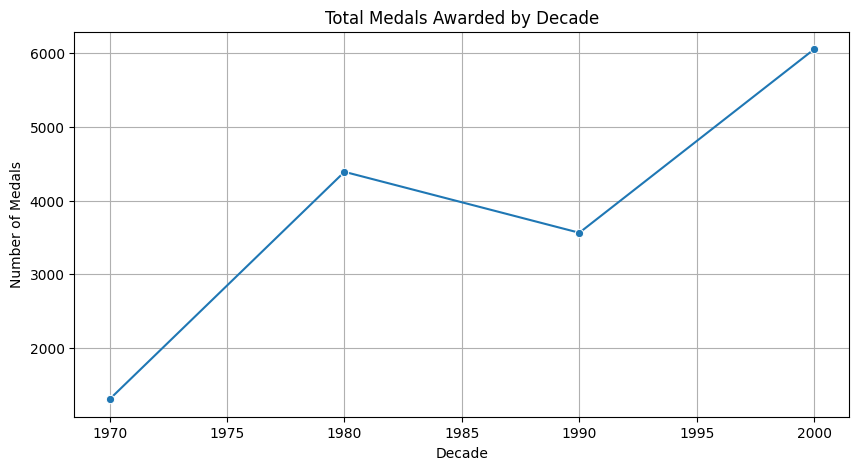

In [29]:
medals_by_decade = df[df['Medal'] != 'No Medal'].groupby('Decade')['Medal'].count()

plt.figure(figsize=(10,5))
sns.lineplot(x=medals_by_decade.index, y=medals_by_decade.values, marker='o')
plt.title("Total Medals Awarded by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Medals")
plt.grid(True)
plt.show()


#  10. Medals by Decade
#  Visualization:
# Line chart showing total medals awarded each decade.

#  Insight:
# Continuous increase in medal counts over decades.

# Indicates Olympics scale and diversity has grown steadily.


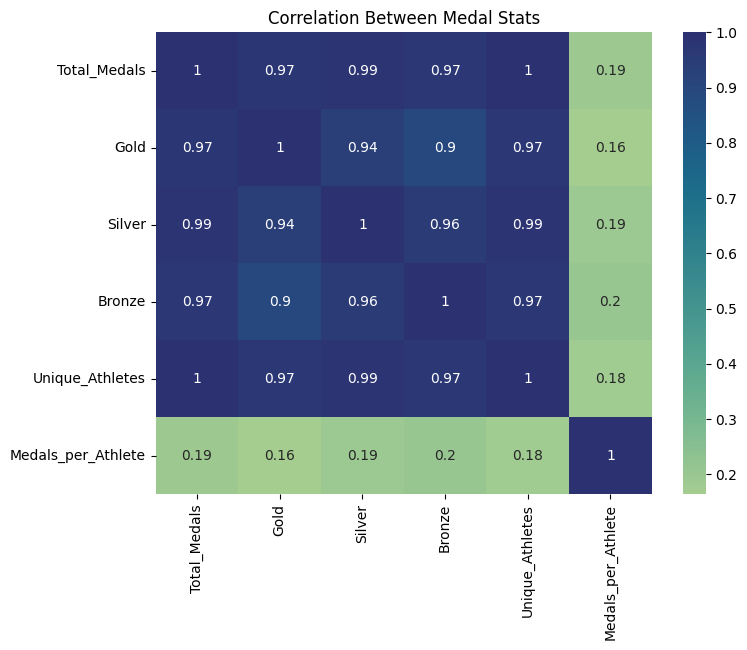

In [30]:
numeric_data = country_medals[['Total_Medals', 'Gold', 'Silver', 'Bronze', 'Unique_Athletes', 'Medals_per_Athlete']]
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='crest')
plt.title("Correlation Between Medal Stats")
plt.show()


# 11. Correlation Heatmap
# Visualization:
# Heatmap showing correlation between numerical features.

#  Insight:
# Strong correlation between Gold, Silver, Bronze, and Total Medals.

# Unique_Athletes highly correlates with Total_Medals.

# Medals_per_Athlete shows low correlation, indicating it's an independent metric of performance quality.

In [ ]:

#  Summary (For Final Slide / Report)
# USA is the leading medal winner overall.

# Aquatics and Athletics offer most medal opportunities.

# Female participation is rising steadily, indicating more inclusive games.

# Some nations show high efficiency by winning more with fewer athletes.

# The Olympics has grown steadily in scale and participation.



In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [40]:
X = df[['Sport', 'Discipline', 'Country', 'Gender']]
y = df['Medal']

In [42]:
X_encoded = pd.get_dummies(X)
X_encoded = X_encoded.astype(int)

In [43]:
imputer = SimpleImputer(strategy="constant", fill_value=0)
X_encoded_imputed = imputer.fit_transform(X_encoded)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_imputed, y, test_size=0.2, random_state=42
)

In [50]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [76]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f" Accuracy: {acc:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 1.0000

 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3064

    accuracy                           1.00      3064
   macro avg       1.00      1.00      1.00      3064
weighted avg       1.00      1.00      1.00      3064



In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# STEP 1: Select features and create binary target
X = df[['Sport', 'Discipline', 'Country', 'Gender']]
y = df['Medal'].apply(lambda x: 0 if x == 'No Medal' else 1)  # 1 = Won Medal, 0 = No Medal

# STEP 2: One-hot encode features
X_encoded = pd.get_dummies(X)
X_encoded = X_encoded.astype(int)  # Ensure all columns are numeric

# STEP 3: Impute missing values
imputer = SimpleImputer(strategy="constant", fill_value=0)
X_encoded_imputed = imputer.fit_transform(X_encoded)

# STEP 4: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_imputed, y, test_size=0.2, random_state=42)

# STEP 5: Train Random Forest (balanced classes)
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# STEP 6: Evaluate model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0000

 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3064

    accuracy                           1.00      3064
   macro avg       1.00      1.00      1.00      3064
weighted avg       1.00      1.00      1.00      3064



In [79]:
# STEP 7: Enter athlete's info
athlete = {
    'Sport': 'Athletics',
    'Discipline': 'Athletics',
    'Country': 'USA',  # Make sure there's no trailing space
    'Gender': 'M'
}

# STEP 8: Convert to DataFrame
athlete_df = pd.DataFrame([athlete])

# STEP 9: One-hot encode & align columns with training data
athlete_encoded = pd.get_dummies(athlete_df)
athlete_encoded = athlete_encoded.astype(int)

# Align with model training columns (fill missing ones with 0)
athlete_encoded = athlete_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# STEP 10: Predict and show probability
pred = model.predict(athlete_encoded)
proba = model.predict_proba(athlete_encoded)

print("\n Athlete Prediction:")
print(" Will Win a Medal" if pred[0] == 1 else "❌ No Medal")

print(f" Probability of Winning a Medal: {proba[0][1]*100:.2f}%")
print(f" Probability of NOT Winning a Medal: {proba[0][0]*100:.2f}%")



 Athlete Prediction:
 Will Win a Medal
 Probability of Winning a Medal: 94.00%
 Probability of NOT Winning a Medal: 6.00%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
